<h1><center> 10-315 Introduction to Machine Learning (SCS Majors) <br> Lecture 7: Logistic Regression </center></h1> 


<h2><center> Leila Wehbe <br> Carnegie Mellon University  <br> Machine Learning Department </center></h2> 


<br>

<br>

<br>

<br>


Reading: <a href ="http://www.cs.cmu.edu/~tom/mlbook/NBayesLogReg.pdf"> Generative and Disciminative Classifiers </a> by Tom Mitchell.

#### Lecture outcomes:
- Logistic Regression
- Gradient Descent Review
- Comparing LR and GNB


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import seaborn as sns
sns.set_theme()

x1 = np.linspace(-10,10,1000)
x2 = np.linspace(-10,10,1000)

## Naïve Bayes is a *Generative* classifier


Generative classifiers:
- Assume a functional form for $P(X,Y)$ (or $P(X|Y)$ and $P(Y)$)
- we can view $P(X|Y)$ as describing how to sample random instances $X$ given $Y$.

### Instead of learning P(X|Y), can we learn P(Y|X) directly or learn the decision boundary directly?

## *Discriminative* classifiers

- Assume some functional form for $P(Y|X)$ or for the decision boundary
- Estimate parameters of $P(Y|X)$ directly from training data

## Logistic Regression is a discriminative classifier

Learns $f: X \rightarrow Y$, where
- X is a vector of real-valued or discrete features, $(X_1,...,X_d)$
- Y is boolean (can also be extended for $K$ discrete classes).
<!-- - assume all $X_i$ are conditionally independent given $Y$ -->
<!--  model P(Xi | Y = yk) as Gaussian N(μik,σi) -->
<!--  model P(Y) as Bernoulli (π) -->

$P(Y|X)$ is modeled as:

\begin{eqnarray}
P(Y=1|X) = \frac{1}{1+\exp(- (w_0+\sum_i w_i X_i))} = \frac{\exp(w_0+\sum_i w_i X_i)}{\exp(w_0+\sum_i w_i X_i)+1}
\end{eqnarray}

It uses the logistic (or sigmoid) function: 

\begin{eqnarray}
\frac{1}{1+\exp{-z}}
\end{eqnarray}

Text(0, 0.5, '$P(Y=1|X)$')

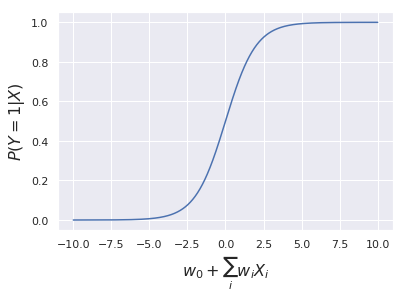

In [2]:
z = np.linspace(-10,10,1000)
plt.plot(z,1/(1+np.exp(-z)))
plt.xlabel(r'$w_0+\sum_i w_i X_i$',fontsize=16)
plt.ylabel(r'$P(Y=1|X)$',fontsize=16)

## What is the form of the decision boundary?

\begin{eqnarray}
\frac{P(Y=1|X)}{P(Y=0|X)} = \frac{ \frac{\exp(w_0+\sum_i w_i X_i)}{\exp(w_0+\sum_i w_i X_i)+1}}{\frac{1}{\exp(w_0+\sum_i w_i X_i)+1}} = \exp(w_0+\sum_i w_i X_i)
\end{eqnarray}

Asking $P(Y=1|X)>P(Y=0|X)$ is the same as asking if $\ln \frac{P(Y=1|X)}{P(Y=0|X)} >0$.

i.e. is $$w_0+\sum_i w_i X_i ~ ~ >0?$$

This is a linear decision boundary!

In [3]:
from scipy.stats import multivariate_normal
# similar to previous example
mu_1_1 = -4; sigma_1_1 = 2;mu_2_1 = 4; sigma_2_1 = 2
mu_1_0 = 4; sigma_1_0 = 2;mu_2_0 = -4; sigma_2_0 = 2
cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )
# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1], cov=cov_positive, size = (20))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0], cov=cov_negative, size = (20))

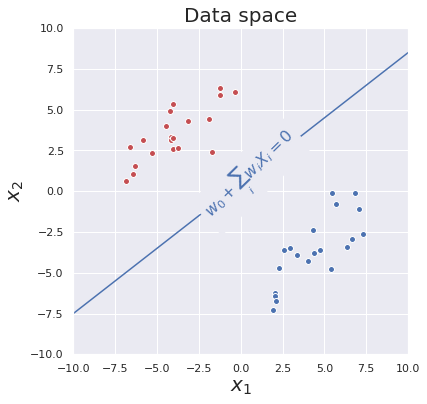

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')

# hand picked line
plt.plot(x1, x1*0.8+0.5)
from labellines import labelLine
labelLine(plt.gca().get_lines()[-1],0.6,label=r'$w_0+\sum_i w_i X_i = 0$',fontsize=16)

plt.axis([-10,10,-10,10],'equal')
plt.xlabel(r'$x_1$',fontsize=20); plt.ylabel(r'$x_2$',fontsize=20)
plt.title('Data space',fontsize=20);

## Logistic Regression is a Linear Classifier


\begin{eqnarray}
P(Y=1|X) = \frac{\exp(w_0+\sum_i w_i X_i)}{\exp(w_0+\sum_i w_i X_i)+1}
\end{eqnarray}


\begin{eqnarray}
P(Y=1|X) = \frac{1}{\exp(w_0+\sum_i w_i X_i)+1}
\end{eqnarray}


The weights $w_i$ are optimized such that when $w_0+\sum_i w_i X_i > 0$ the example is more likely to be positive and when $w_0+\sum_i w_i X_i < 0$ it's more likely to be negative.

$w_0+\sum_i w_i X_i = 0, P(Y=1|X) = \frac{1}{2}$

$w_0+\sum_i w_i X_i \rightarrow \infty, P(Y=1|X) \rightarrow 1$

$w_0+\sum_i w_i X_i \rightarrow -\infty, P(Y=1|X) \rightarrow 0$


## Training Logistic Regression

Let's focus on binary classfication


$
P(Y=1|X) = \frac{\exp(w_0+\sum_i w_i X_i)}{\exp(w_0+\sum_i w_i X_i)+1}
$


$
P(Y=1|X) = \frac{1}{\exp(w_0+\sum_i w_i X_i)+1}
$

**How to learn $w_0$, $w_1$...$w_d$?**

Training data: $\{(X^{(j)},Y^{(j)})\}_{j=1}^n$, with   $~X^{(j)}=\left(X_1^{(j)},X_2^{(j)},...X_d^{(j)} \right)$

Maximum Likelihood Estimation:

 $$\hat {\bf w}_{\text{MLE}} = \underset{{\bf w}}{\operatorname{argmax}}  \prod_{j=1}^n P(X^{(j)},Y^{(j)}| {\bf w})$$


**Problem**: We don’t have a model for $P(X)$ or $P(X|Y)$ – only for $P(Y|X)$

## Training Logistic Regression

**Discriminative philosophy** – Don’t waste effort learning $P(X)$, focus
on $P(Y|X)$ – that’s all that matters for classification!

Maximum (Conditional) Likelihood Estimation:

 $$\hat {\bf w}_{\text{MCLE}} = \underset{{\bf w}}{\operatorname{argmax}}  \prod_{j=1}^n P(Y^{(j)}|X^{(j)},{\bf w})$$


## Conditional log likelihood:

$$
P(Y=1|X) = \frac{\exp(w_0+\sum_i w_i X_i)}{\exp(w_0+\sum_i w_i X_i)+1}
~ ~ ~ ~ ~ ~
P(Y=1|X) = \frac{1}{\exp(w_0+\sum_i w_i X_i)+1}
$$

\begin{eqnarray}
l({\bf w}) &\equiv& \ln \prod_j P(y^{j}|{\bf x}^{j},{\bf w})\\
&=& \ln \sum_j   \prod_{j,y^j=1} \left(\frac {\exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)}{1 + \exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)}\right) 
\prod_{j,y^j=0} \left(\frac {1}{1 +  \exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)}\right) 
\\
&=&  \sum_{j,y^j=1} \ln \left(\frac {\exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)}{1 + \exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)}\right) + 
\sum_{j,y^j=0} \ln \left(\frac {1}{1 +  \exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)}\right) 
\\
&=& \sum_j \left [ y^j \left( w_0 + \sum_{i=1}^d w_ix_i^j \right)  - \ln \left( 1 + \exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)  \right) \right]
\end{eqnarray}



## Maximizing Conditional Log Likelihood


\begin{eqnarray}
l({\bf w}) &\equiv& \ln \prod_j P(y^{j}|{\bf x}^{j},{\bf w})\\
&=& \sum_j \left [ y^j \left( w_0 + \sum_{i=1}^d w_ix_i^j \right)  - \ln \left( 1 + \exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)  \right) \right]
\end{eqnarray}


$$\hat {\bf w}_{\text{MCLE}} = \underset{{\bf w}}{\operatorname{argmax}} l({\bf w})$$


- Good news: $l({\bf w})$ is concave in ${\bf w}$. Local optimum = global optimum 
- Bad news: no closed-form solution to maximize $l({\bf w})$
- Good news: concave functions easy to optimize (unique maximum)


## Optimizing concave/convex function

- $l({\bf w})$ concave, we can maximize it via gradient ascent

Gradient:
$$\nabla_{{\bf w}} l({\bf w}) = \left[ \frac{\partial l({\bf w}) }{\partial w_0},...,\frac{\partial l({\bf w})}{\partial w_d} \right] $$ 

Update rule for gradient ascent, with **learning rate $\eta>0$**
$$\Delta{\bf w} = \eta\nabla_{{\bf w}} l({\bf w}) $$

$$  w_i^{(t+1)} = w_i^{(t)}+\eta \frac{\partial l({\bf w})}{\partial w_i}\mid_{w_t} $$ 



## Optimizing concave/convex function

- It's more common to use gradient descent to minimize a convex fuction

Update rule for gradient **descent**, with learning rate $\eta>0$
$$\Delta{\bf w} = - \eta\nabla_{{\bf w}} l({\bf w}) $$

$$  w_i^{(t+1)} = w_i^{(t)} - \eta \frac{\partial l({\bf w})}{\partial w_i}\mid_{w_t} $$ 


(maximizing $l({\bf w})$ is the same as minimizing $l'({\bf w}) = -l({\bf w})$)

## Gradient Descent 


Review, let's start with a simple function: 


$$f(w) = 0.2(w - 2) ^2 + 1$$


We know that this function is convex (2nd derivative exists and is positive).



In [5]:
f = lambda w: 0.2*(w-2)**2+1
dfdw = lambda w: 0.4*w - 0.8

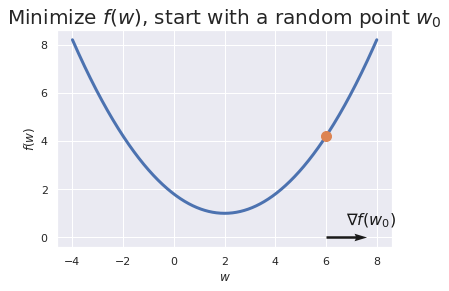

In [6]:
w = np.linspace(-4,8,1000)
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')
plt.title(r'Minimize $f(w)$, start with a random point $w_0$',fontsize = 20);
w_0 = 6
plt.plot(w_0, f(w_0), "o",markersize=10)

def draw_vector_2D(ax, x, y, lenx, leny,name,color='k'):
#     grad = np.array([-np.sin(x),np.cos(y)])
    ax.quiver(x,y,lenx, leny, color=color,angles='xy', scale_units='xy', scale=1)
    ax.text(x+lenx/2, y+leny/2+0.5,name,fontsize = 16,color=color)
    
draw_vector_2D(plt, w_0, 0, dfdw(w_0),0, r'$\nabla f(w_0)$','k')

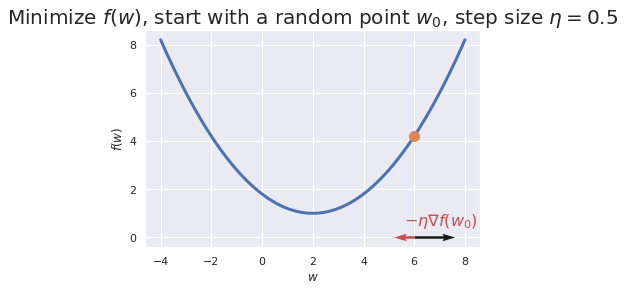

In [7]:
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')

plt.title(r'Minimize $f(w)$, start with a random point $w_0$, step size $\eta=0.5$',fontsize = 20);
w_0 = 6
plt.plot(w_0, f(w_0), "o",markersize=10)
    
draw_vector_2D(plt, w_0, 0, dfdw(w_0),0, r' ','k')

eta=0.5

draw_vector_2D(plt, w_0, 0, - dfdw(w_0)*eta,0, r'$-\eta\nabla f(w_0)$','r')

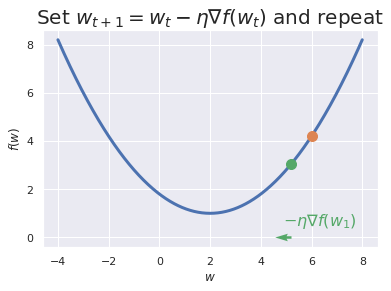

In [8]:
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')

w_1 = w_0 - dfdw(w_0)*eta

plt.title(r'Set $w_{t+1} = w_{t}  - \eta \nabla f(w_t)$ and repeat', fontsize = 20);

plt.plot(w_0, f(w_0), "o",markersize=10)
plt.plot(w_1, f(w_1), "o",markersize=10)

draw_vector_2D(plt, w_1, 0, - dfdw(w_1)*eta,0, r'$-\eta\nabla f(w_1)$','g')

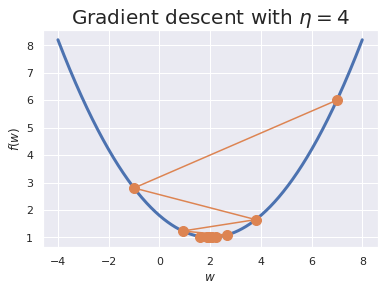

In [9]:
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')

# w_1 = w_0 - dfdw(w_0)*eta
w_t = np.zeros(10)
w_t[0] = 7  # w_0
 
eta = 4
    
for i in range(1,10):
    w_t[i] =  w_t[i-1] - eta * dfdw(w_t[i-1] )

plt.title(r'Gradient descent with $\eta={}$'.format(eta), fontsize = 20);

plt.plot(w_t, f(w_t), "o-",markersize=10)

# draw_vector_2D(plt, w_1, 0, - dfdw(w_1)*eta,0, r'$-\eta\nabla f(w_1)$','r')

### Let's plot a function with two variables and look at the gradient

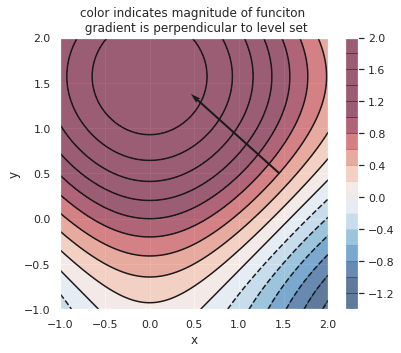

In [10]:
x = np.linspace(-1,2,100);y = np.linspace(-1,2,100); X,Y = np.meshgrid(x, y)

f_XY = np.cos(X)+np.sin(Y)

plt.figure(figsize=(6,5))
cs = plt.contourf(X, Y, f_XY,20,cmap='RdBu_r',vmin=-1,vmax=1,alpha=0.6);plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel('x');plt.ylabel('y')
plt.title('color indicates magnitude of funciton \n gradient is perpendicular to level set')

draw_vector_2D(plt, 1.45,0.5,-np.sin(1.45),np.cos(0.5),'','k')

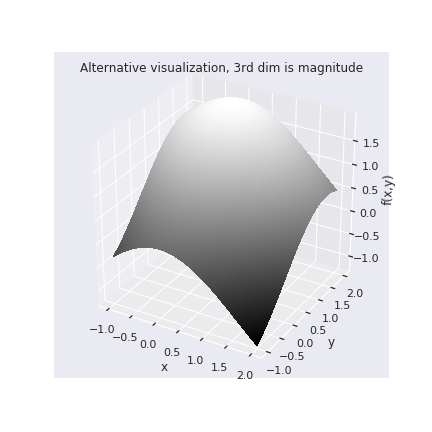

In [11]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
Z = np.cos(X)+np.sin(Y)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='gray',
                       linewidth=0, antialiased=False, rcount=200, ccount=200)
ax.set_xlabel('x');ax.set_ylabel('y');ax.set_zlabel('f(x,y)');
ax.set_title('Alternative visualization, 3rd dim is magnitude');

## Logistic regression gradient ascent

Simple simulated example

In [12]:
# Previous example
mu_1_1 = -5; sigma_1_1 = 2;mu_2_1 = 5; sigma_2_1 = 2
mu_1_0 = 5; sigma_1_0 = 2; mu_2_0 = -5; sigma_2_0 = 2
cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )
# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1], cov=cov_positive, size = (20))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0], cov=cov_negative, size = (20))

X = np.vstack([X_positive, X_negative])
Y = np.vstack([np.ones((X_positive.shape[0],1)),np.zeros((X_negative.shape[0],1))])

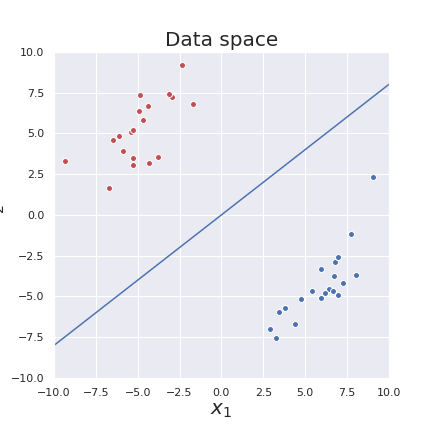

In [13]:
plt.figure(figsize=(6,6))

plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.plot(x1, x1*0.8)

plt.axis([-10,10,-10,10],'equal')
plt.xlabel(r'$x_1$',fontsize=20)
plt.ylabel(r'$x_2$',fontsize=20)
plt.title('Data space',fontsize=20);

## Log likelihood plot

\begin{eqnarray}
l({\bf w}) &=& \sum_j \left [ y^j \left( w_0 + \sum_{i=1}^d w_ix_i^j \right)  - \ln \left( 1 + \exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)  \right) \right]
\end{eqnarray}


#### We omit $w_0$ in the example below for simplicity

In [14]:
w1x = np.linspace(-60,40,100)
w2x = np.linspace(-60,40,100)
W1,W2 = np.meshgrid(w1x, w2x)

## ommiting w_0 just for illustration
def loglikelihood(w1,w2):
    w = np.array([[w1],[w2]]) # make w_vec
    loglihood = np.sum(Y*X.dot(w) - np.log(1+ np.exp(X.dot(w))))
    return loglihood
                  
L_w = np.vectorize(loglikelihood)(*np.meshgrid(w1x, w2x))

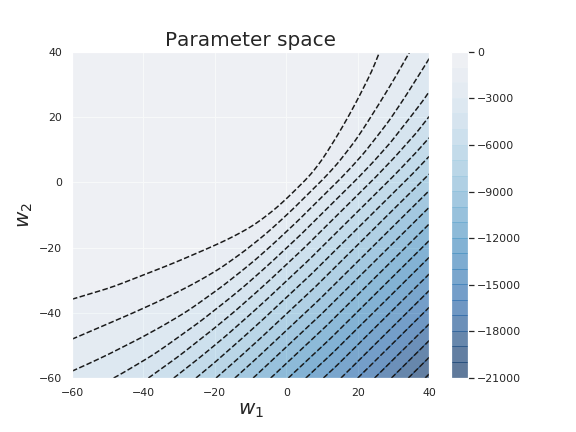

In [15]:
plt.figure(figsize=(8,6))

cs = plt.contourf(W1, W2, L_w,20,cmap='RdBu_r',vmin=-np.max(np.abs(L_w)),
                 vmax=np.max(np.abs(L_w)),alpha=0.6);
plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel(r'$w_1$',fontsize=20)
plt.ylabel(r'$w_2$',fontsize=20)
plt.title('Parameter space',fontsize=20);

## Gradient computation

\begin{eqnarray}
l({\bf w}) &=& \sum_j \left [ y^j \left( w_0 + \sum_{i=1}^d w_ix_i^j \right)  - \ln \left( 1 + \exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)  \right) \right]
\end{eqnarray}

\begin{eqnarray}
\frac{\partial l({\bf w})}{\partial w_0} &=& \sum_j \left [ y^j   - \frac{\exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)} {\left( 1 + \exp \left(  w_0 + \sum_{i=1}^d w_ix_i^j \right)  \right) }  \right] \\
&=& \sum_j \left [ y^j - \hat P(Y^j=1|{\bf x}^j, {\bf w^{(t)}}) \right]
\end{eqnarray}

for $i = 1...d$:

\begin{eqnarray}
\frac{\partial l({\bf w})}{\partial w_0} &=& \sum_jx_i^j \left [ y^j - \hat P(Y^j=1|{\bf x}^j, {\bf w^{(t)}}) \right]
\end{eqnarray}


In [16]:
def gradient_likelihood(w1,w2,X,Y):
    w = np.array([[w1],[w2]])
    P_Y_1 = np.exp(X.dot(w))/(1+ np.exp(X.dot(w)))
    gw1 = X[:,0:1].T.dot(Y-P_Y_1)
    gw2 = X[:,1:2].T.dot(Y-P_Y_1)
    return gw1, gw2

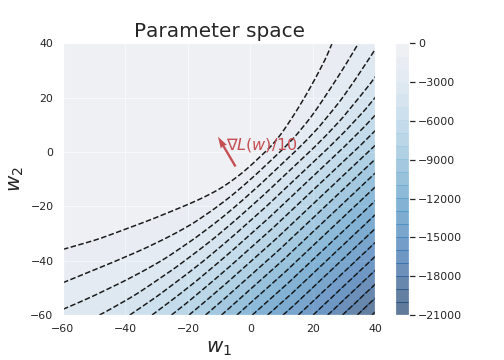

In [17]:
plt.figure(figsize=(7,5))
cs = plt.contourf(W1, W2, L_w,20,cmap='RdBu_r',vmin=-np.max(np.abs(L_w)),
                 vmax=np.max(np.abs(L_w)),alpha=0.6); plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel(r'$w_1$',fontsize=20);plt.ylabel(r'$w_2$',fontsize=20)
plt.title('Parameter space',fontsize=20);

w1 = -5; w2 = -5
gw1, gw2 = gradient_likelihood(w1,w2,X, Y)
draw_vector_2D(plt, w1,w2,gw1/10,gw2/10, r'$\nabla L(w)/10$','r');

## Gradient ascent for logistic regression

Iterate until convergence (until change $< \epsilon$)

\begin{eqnarray}
 w_0^{(t+1)} = w_0^{(t)} + \eta \sum_j \left [ y^j - \hat P(Y^j=1|{\bf x}^j, {\bf w^{(t)}}) \right]
\end{eqnarray}

for $i = 1...d$:

\begin{eqnarray}
w_i^{(t+1)} =  w_i^{(t)} + \eta \sum_jx_i^j \left [ y^j - \hat P(Y^j=1|{\bf x}^j, {\bf w^{(t)}}) \right]
\end{eqnarray}


$\hat P(Y^j=1|{\bf x}^j, {\bf w^{(t)}})$ is our current prediction of the label.
- compare this to actual label
- multiple difference by feature value

## Gradient Ascent (Descent) is simplest of approaches

Compare to:
- Stochastic Gradient Descent

- Batch Gradient Descent

- Newton

...

- Convergence?

Effect of step-size 
Large  ⇒ Fast convergence but larger residual error
Also possible oscillations
Small  ⇒ Slow convergence but small residual error

## Need to regularize the weights

- $w\rightarrow \infty$ if the data is linearly separable

- For MAP, need to define prior on $W$
    - given $W = (w_1, … w_d)$
    - let’s assume prior $P(w_i) = \mathcal{N}(0, \sigma)$

- A kind of Occam’s razor (simplest is best) prior

- Helps avoid very large weights and overfitting

## Adding a prior on $W$

MAP estimation picks the parameter $W$ that has maximum posterior probability $P(W|Y,X)$ given the conditional likelihood $P(Y|W,X)$ and the prior $P(W)$.

Using Bayes rule again:

\begin{eqnarray} W^{MAP} &=& \underset{W}{\operatorname{argmax}} P(W|Y,W)   = \underset{W}  {\operatorname{argmax}} \frac{P(Y|W,X)P(W,X)}{P(Y,X)} \\
&=& \underset{W}{\operatorname{argmax}} P(Y|W,X)P(W,X) \\
&=& \underset{W}{\operatorname{argmax}} P(Y|W,X)P(W)P(X) ~~~~~ \text{ assume } P(W,X) = P(W)P(X) \\
&=& \underset{W}{\operatorname{argmax}} P(Y|W,X)P(W)\\
&=& \underset{W}{\operatorname{argmax}} \ln P(Y|W,X) + \ln P(W)
\end{eqnarray}

Zero Mean Gaussian prior on $W$: $W\sim \frac{1}{2\pi\sigma^2}\exp\big(-\frac{1}{2\sigma^2}\sum_iw_i^2 \big )$

\begin{eqnarray} W^{MAP}  = \underset{W}{\operatorname{argmax}} \ln P(Y|W,X) - \left(\frac{1}{2\sigma^2}\sum_iw_i^2 \right )
\end{eqnarray}

This “Pushes” parameters towards zero and corresponds to Regularization
– Helps avoid very large weights and overfitting
– More on this later in the semester

In [18]:
lmbda = 10 # this is 1/(2*sigma**2)

def logposterior(w1,w2):
    w = np.array([[w1],[w2]]) # make w_vec
    loglihood = np.sum(Y*X.dot(w) - np.log(1+ np.exp(X.dot(w))))
    loglihood += - (w1**2 + w2**2)*lmbda
    return loglihood

L_w = np.vectorize(logposterior)(*np.meshgrid(w1x, w2x))

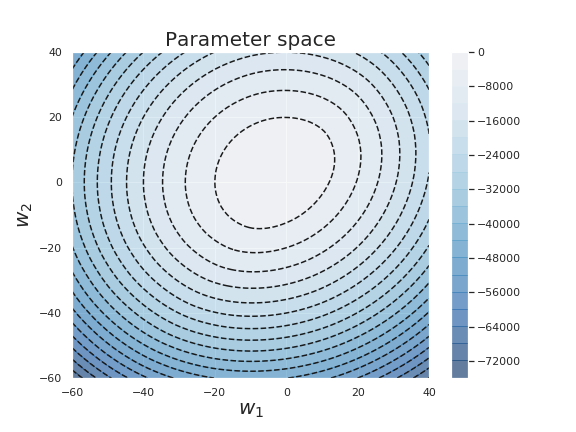

In [19]:
plt.figure(figsize=(8,6))
cs = plt.contourf(W1, W2, L_w,20,cmap='RdBu_r',vmin=-np.max(np.abs(L_w)),
                 vmax=np.max(np.abs(L_w)),alpha=0.6);
plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel(r'$w_1$',fontsize=20)
plt.ylabel(r'$w_2$',fontsize=20)
plt.title('Parameter space',fontsize=20);

In [20]:
def gradient_posterior(w1,w2,X,Y):
    w = np.array([[w1],[w2]])
    P_Y_1 = np.exp(X.dot(w))/(1+ np.exp(X.dot(w)))
    gw1 = X[:,0:1].T.dot(Y-P_Y_1)- 2*lmbda*w1#
        
    gw2 =X[:,1:2].T.dot(Y-P_Y_1) - 2*lmbda*w2 #
        
    return gw1, gw2

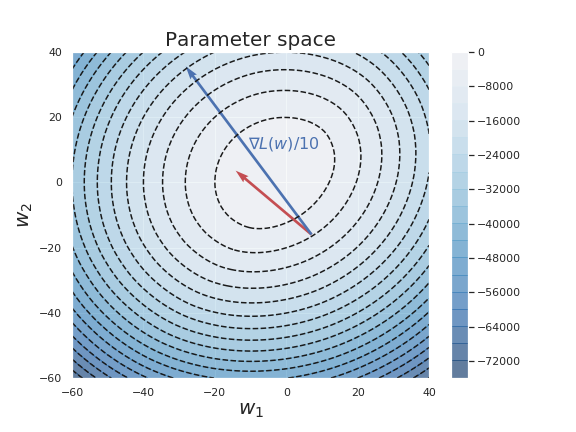

In [22]:
plt.figure(figsize=(8,6))
cs = plt.contourf(W1, W2, L_w,20,cmap='RdBu_r',vmin=-np.max(np.abs(L_w)),
                 vmax=np.max(np.abs(L_w)),alpha=0.6); plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel(r'$w_1$',fontsize=20);plt.ylabel(r'$w_2$',fontsize=20)
plt.title('Parameter space',fontsize=20);

w1 = 7; w2 = -16
gw1, gw2 = gradient_likelihood(w1,w2,X, Y)
draw_vector_2D(plt, w1,w2,gw1/10,gw2/10, r' ','r');
gw1, gw2 = gradient_posterior(w1,w2,X, Y)
draw_vector_2D(plt, w1,w2,gw1/10,gw2/10, r'$\nabla L(w)/10$','b');

## What you should know

LR is a linear classifier: decision rule is a hyperplane
- LR optimized by conditional likelihood
    - no closed-form solution
    - concave ⇒ global optimum with gradient ascent
    - Maximum conditional a posteriori corresponds to regularization